# Relatorio de Análise 03

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums

In [3]:
gorjetas = pd.read_csv("datasets/dataframe_gorjetas.csv")

In [4]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


**Tem algum dia da Semana que as pessoa dão mais gorjetas ?**

In [5]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

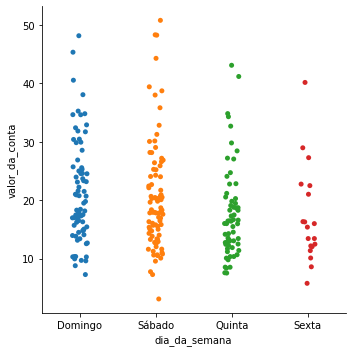

In [6]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

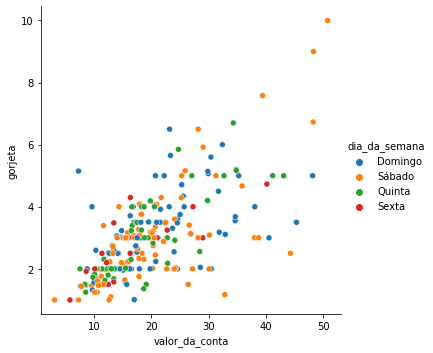

In [7]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

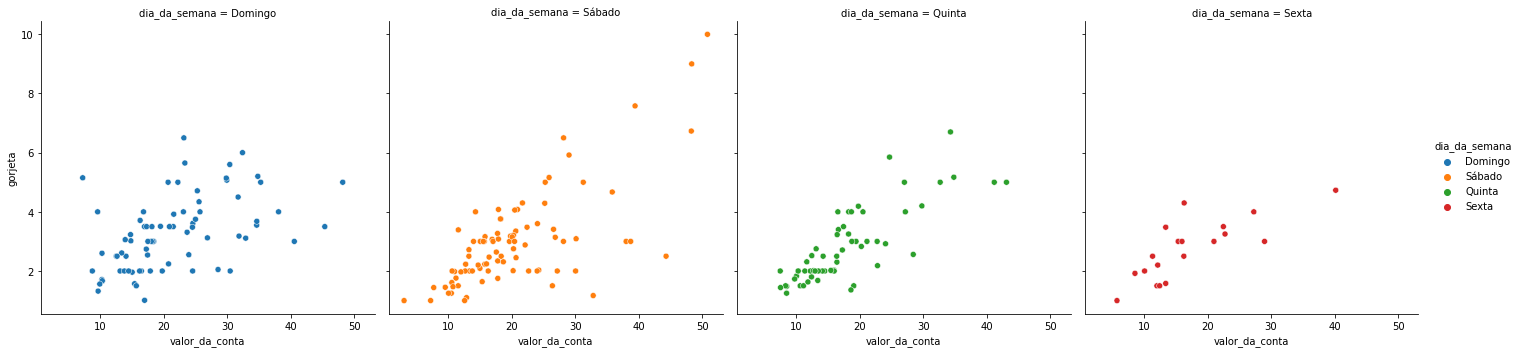

In [8]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

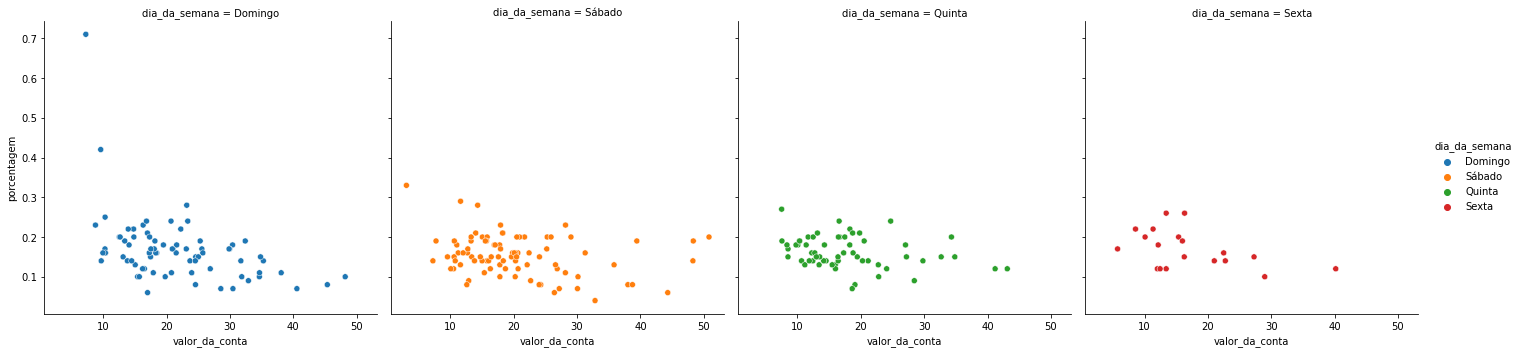

In [9]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

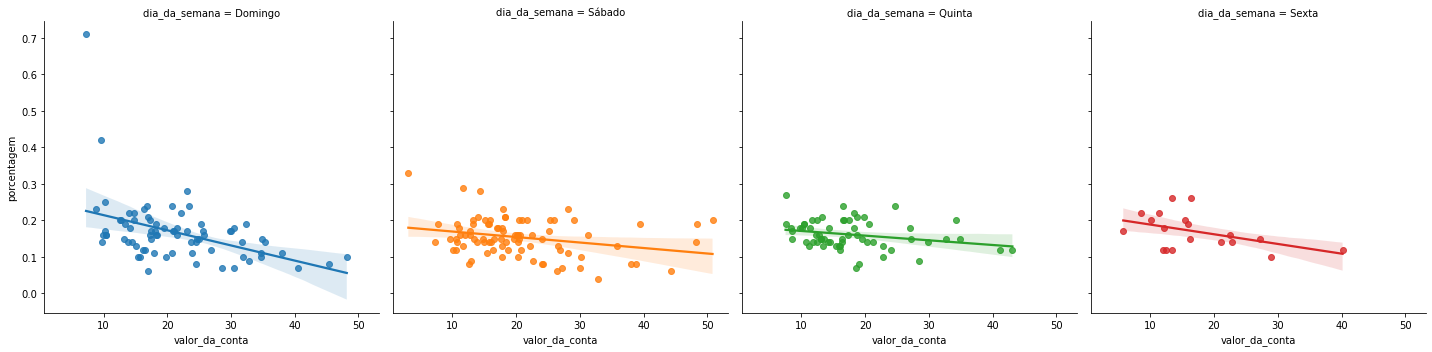

In [10]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

### Análise Descritiva

In [22]:
media_geral_gorjeta = gorjetas.gorjeta.mean

In [21]:
media_geral_gorjeta()

2.9982786885245902

In [25]:
semana_media_geral_gorjeta = gorjetas.groupby(['dia_da_semana']).mean()

In [26]:
semana_media_geral_gorjeta

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


### Teste de Hipótese

**H<sup>null<sup>**
    
- **A distribuição do valor na conta é igual no sábado e no domingo**
    
**H<sup>Alt<sup>**
    
- **A distribuição do valor na conta não é igual no sábado e no domingo**

In [30]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [31]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [33]:
r = ranksums(valor_conta_domingo, valor_conta_sabado)

In [34]:
r

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)